## **Fase 2 - Análisis Exploratorio de Datos (EDA)**
*El Análisis Exploratorio de Datos (EDA) es una etapa fundamental en el proceso analítico, donde se busca comprender las características principales de los datos y descubrir patrones ocultos.El objetivo del EDA es proporcionar una visión general y profunda del conjunto de datos, utilizando técnicas estadísticas y visuales. Esto no solo facilita la detección de anomalías y tendencias, sino que también ayuda a tomar decisiones informadas sobre el modelo analítico a aplicar. Con una sólida exploración, aseguramos que cada aspecto relevante de los datos sea considerado, estableciendo así el camino para un análisis robusto y preciso.*.

In [1]:
# ⁠General
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium

In [2]:
df = pd.read_csv('df_final_cleaned.csv')

In [3]:
df

,urls,timestamp,record_id,Titles,Host_name,Property_types,Prices_per_night,Location,Ratings,Num_reviews,Cleaning_fee,Baños,Maximum_guests,Dormitorios,Camas,check_in_hour,check_out_hour,total_hours_checkin
0,https://www.airbnb.es/rooms/125284963667401123...,2024-11-07 10:12:02,1252849636674011237,Reserva una (o más) camas en este dormitorio c...,Generator,Habitación,19.0,NaN,4.75,4.0,0.0,NaN,NaN,NaN,NaN,14:00,10:00,10.0
1,https://www.airbnb.es/rooms/128244586043482024...,2024-11-07 10:12:02,1282445860434820248,Te damos la bienvenida a este elegante apartam...,HostPro,Alojamiento entero,110.0,"Barcelona, Catalunya, España",0.00,0.0,60.0,1.0,NaN,2.0,3.0,15:00,11:00,9.0
2,https://www.airbnb.es/rooms/128028819924646861...,2024-11-07 10:12:02,1280288199246468615,Excelente y acogedor apartamento a solo '2 cam...,Lautaro Gaspar,Habitación,32.0,"Barcelona, Catalunya, España",0.00,0.0,0.0,NaN,NaN,NaN,1.0,16:00,11:00,8.0
3,https://www.airbnb.es/rooms/850684095339937556...,2024-11-07 10:12:02,850684095339937556,Desconecta de la rutina en este alojamiento a ...,Marta+Paul,Alojamiento entero,80.0,NaN,5.00,5.0,90.0,1.0,NaN,1.0,1.0,15:00,11:00,9.0
4,https://www.airbnb.es/rooms/127904085557632410...,2024-11-07 10:12:02,1279040855576324107,Este anfitrión tiene 979 evaluaciones de otros...,David,Habitación,46.0,"Barcelona, Catalunya, España",0.00,0.0,15.0,NaN,1.0,NaN,1.0,17:00,11:00,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,https://www.airbnb.es/rooms/980869578850279543...,2024-11-07 10:12:02,980869578850279543,Fantástico apartamento en zona tranquila cerca...,Gerard,Alojamiento entero,75.0,NaN,4.71,7.0,49.0,1.0,6.0,3.0,3.0,15:00,11:00,9.0
2569,https://www.airbnb.es/rooms/117217609467130632...,2024-11-07 10:12:02,1172176094671306326,La habitación privada en un apartamento compar...,Nayma,Habitación,59.0,"Barcelona, Catalunya, España",4.67,12.0,20.0,NaN,2.0,NaN,1.0,14:00,11:00,10.0
2570,https://www.airbnb.es/rooms/113957490656102190...,2024-11-07 10:12:02,1139574906561021902,Este anfitrión tiene 16 evaluaciones de otros ...,Jean,Habitación,45.0,"Barcelona, Catalunya, España",0.00,0.0,30.0,NaN,1.0,NaN,1.0,10:00,10:00,14.0
2571,https://www.airbnb.es/rooms/5394263?adults=1&c...,2024-11-07 10:12:02,5394263,"Ático renovado con terraza soleada y privada, ...",Eduard,Alojamiento entero,132.0,NaN,4.90,0.0,35.0,1.0,2.0,1.0,1.0,16:00,12:00,8.0


#### Durante este análisis, nos centraremos en:
- **Características numéricas**: Analizaremos las distribuciones, posibles valores atípicos y estadísticas descriptivas de las variables numéricas, como los precios por noche, las valoraciones y la cantidad de reseñas.
- **Características categóricas**: Examinaremos cómo se distribuyen las variables categóricas, como el tipo de propiedad y los servicios ofrecidos.
- **Manejo de valores atípicos**: Identificaremos posibles outliers en las variables numéricas que puedan afectar la calidad de nuestros análisis.

##### *A través de este análisis, obtendremos una comprensión más clara de la estructura de los datos y descubriremos posibles relaciones que nos ayuden a generar insights valiosos sobre las propiedades de Airbnb*.

In [4]:
# Filtrar columnas que no aportan valor para la análisis
excluded_columns = ['urls', 'timestamp', 'record_id', 'Titles', 'Location','Host_name']

In [5]:
def eda_visualization(df):
    # Análisis de las columnas numéricas
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # No hacer nada si la columna está en excluded_columns
        if column in excluded_columns:
            continue
        
        # Subplot 1: Histograma para ver la distribución de la columna
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True, color='blue')
        plt.title(f'Histograma de {column}')
        
        # Subplot 2: Boxplot para identificar outliers
        plt.subplot(1, 3, 2)
        sns.boxplot(df[column], color='red')
        plt.title(f'Boxplot de {column}')
        
        # Ajuste para que los subplots no se sobrepongan
        plt.tight_layout()
        plt.show()

    # Análisis de las columnas categóricas
    for column in df.select_dtypes(include=['object']).columns:
        # Si la columna está en excluded_columns, no realizar la visualización
        if column in excluded_columns:
            continue        
        
        # Subplot 1: Countplot para ver la distribución de las categorías
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], order=df[column].value_counts().index)
        plt.title(f'Frecuencia de {column}')
        plt.xticks(rotation=45)

        # Subplot 2: Boxplot para ver cómo las categorías influyen
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color='purple')
        plt.title(f'Relación entre {column} y {column}')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()


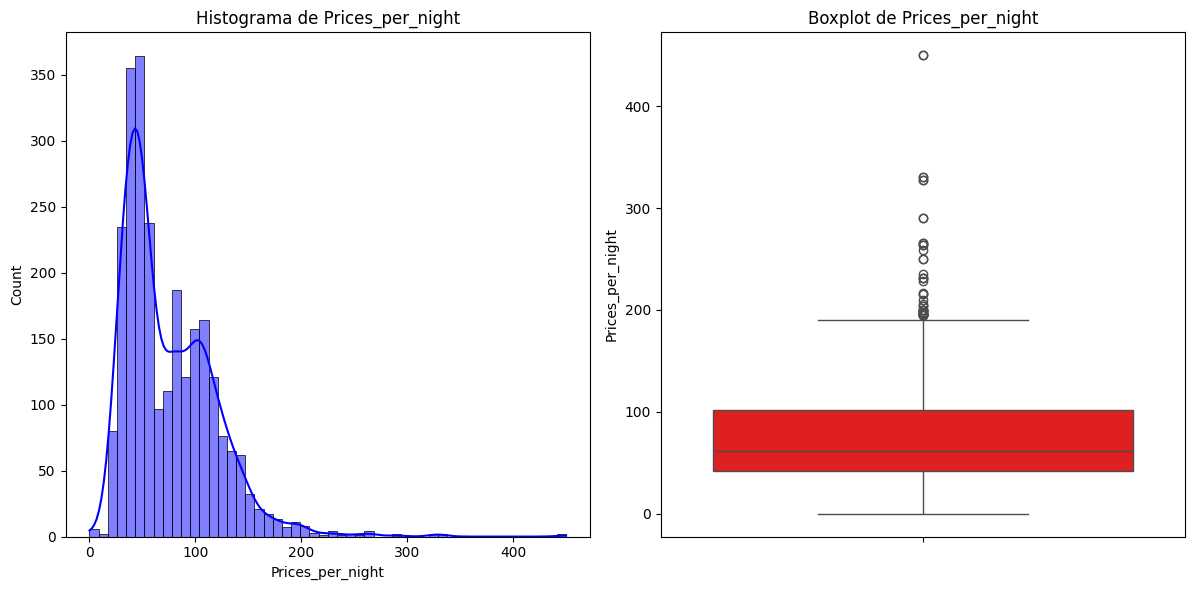

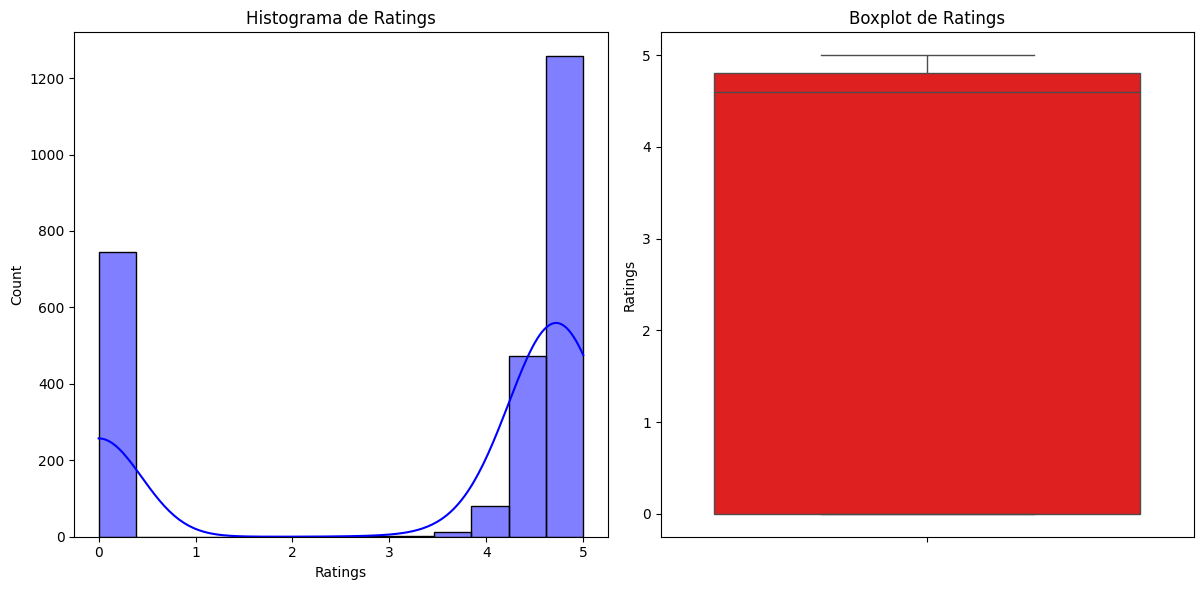

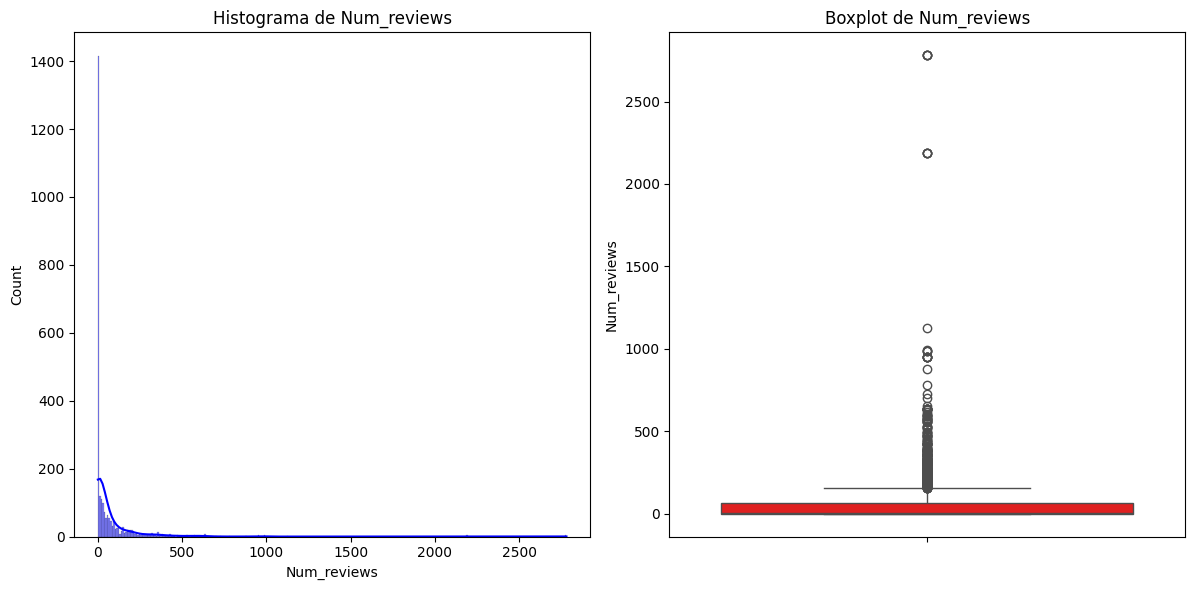

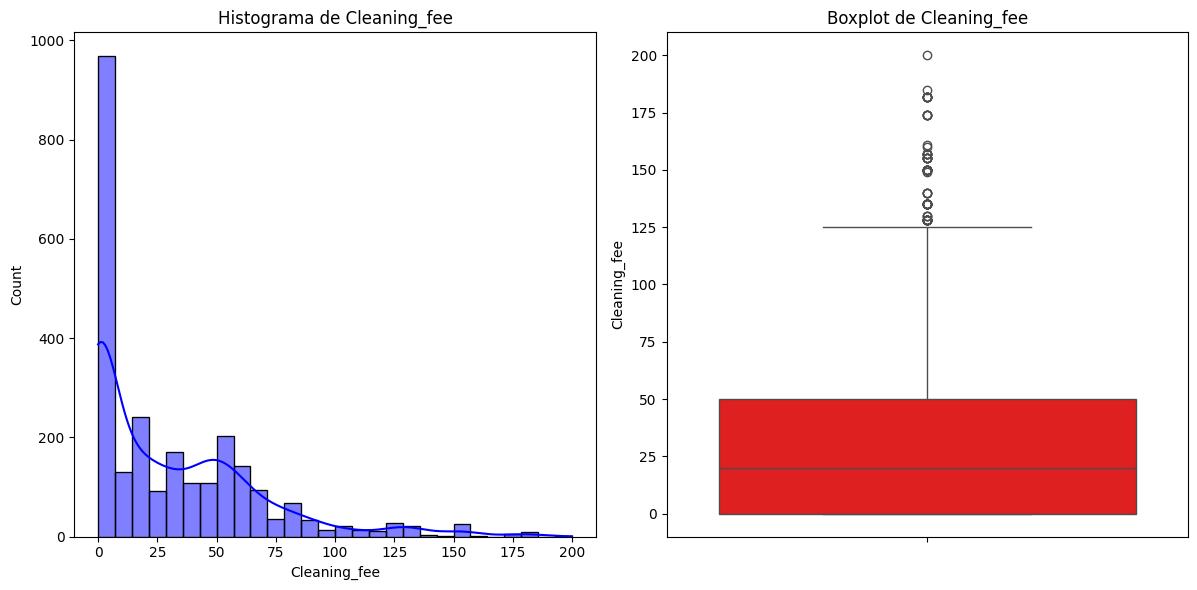

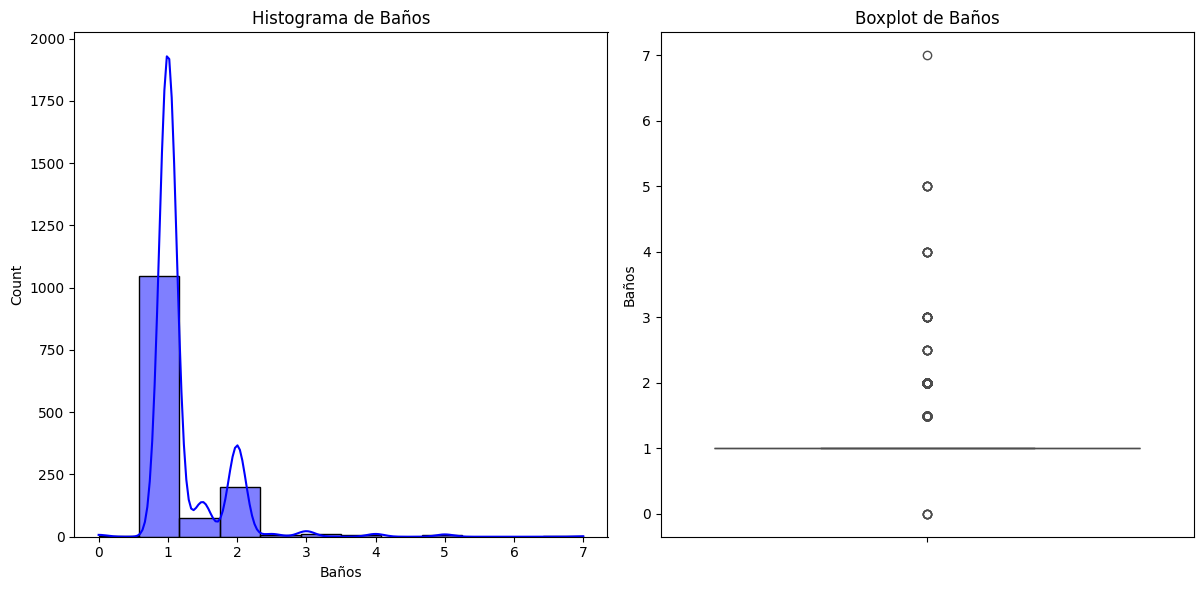

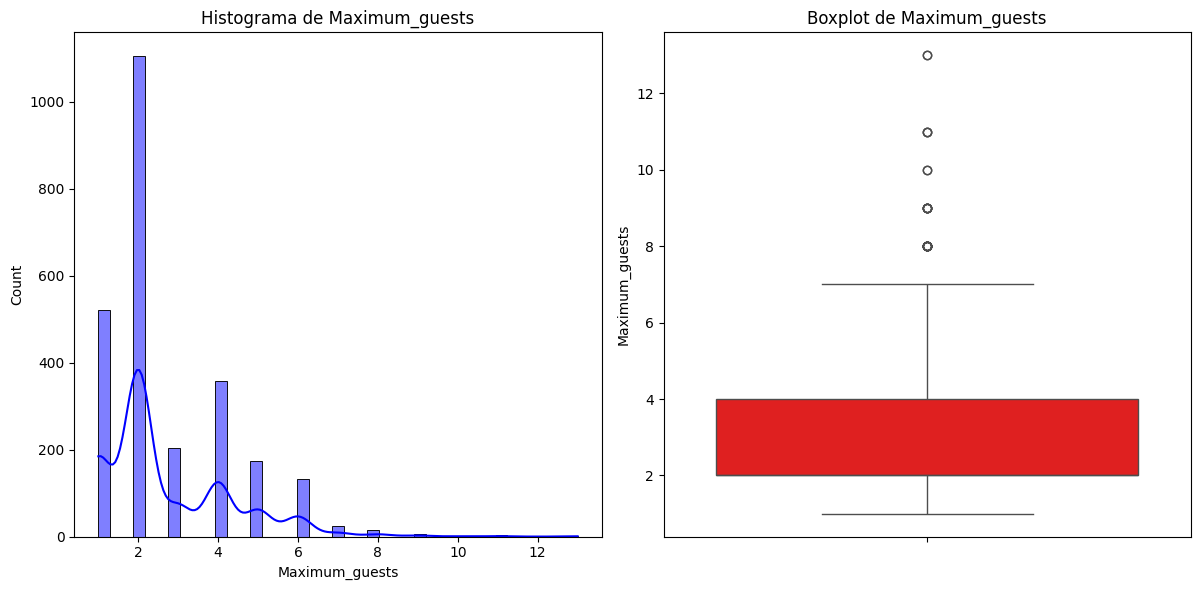

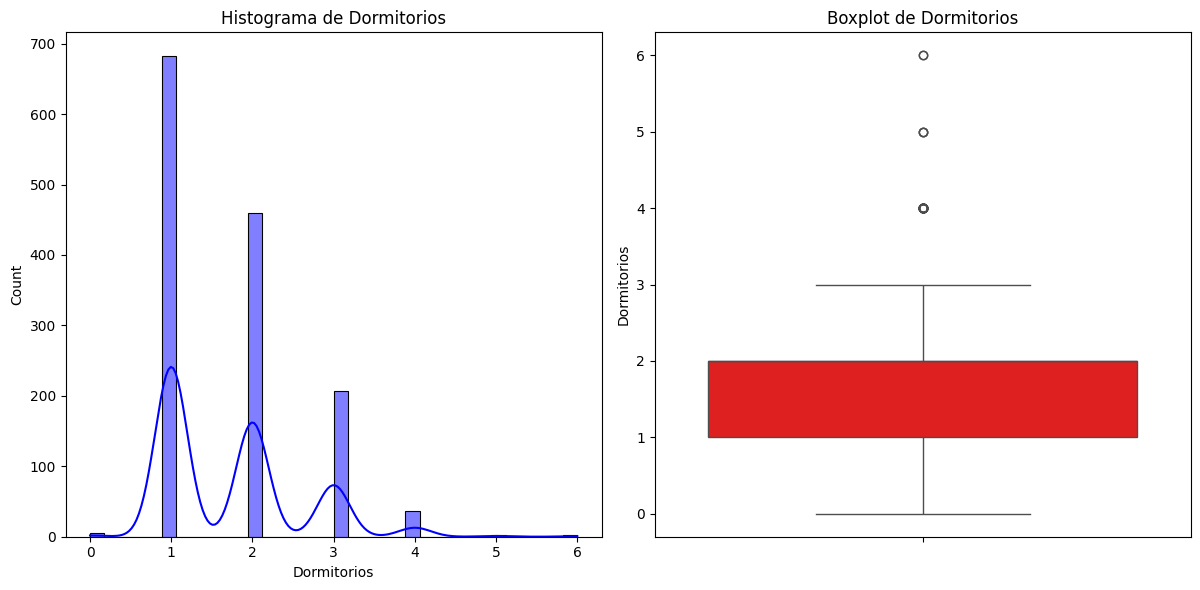

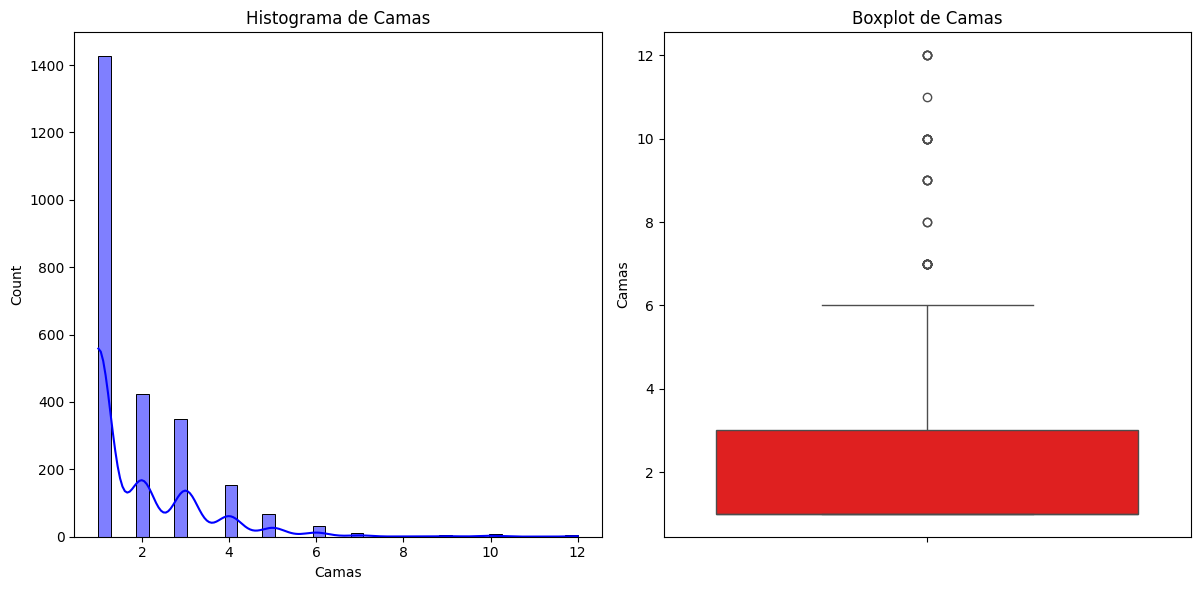

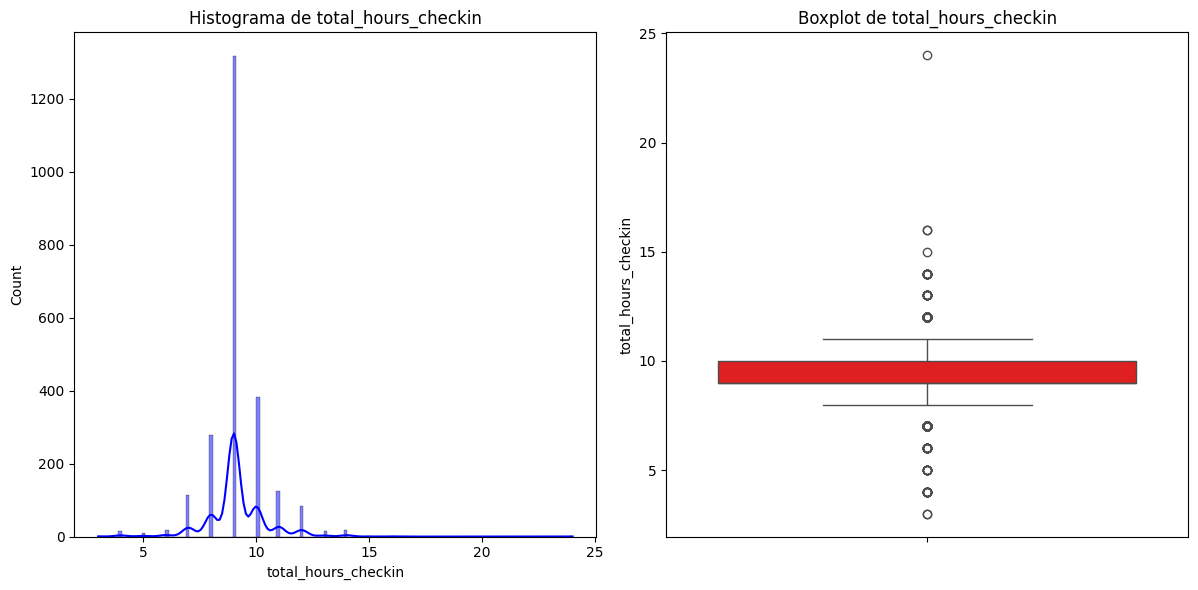

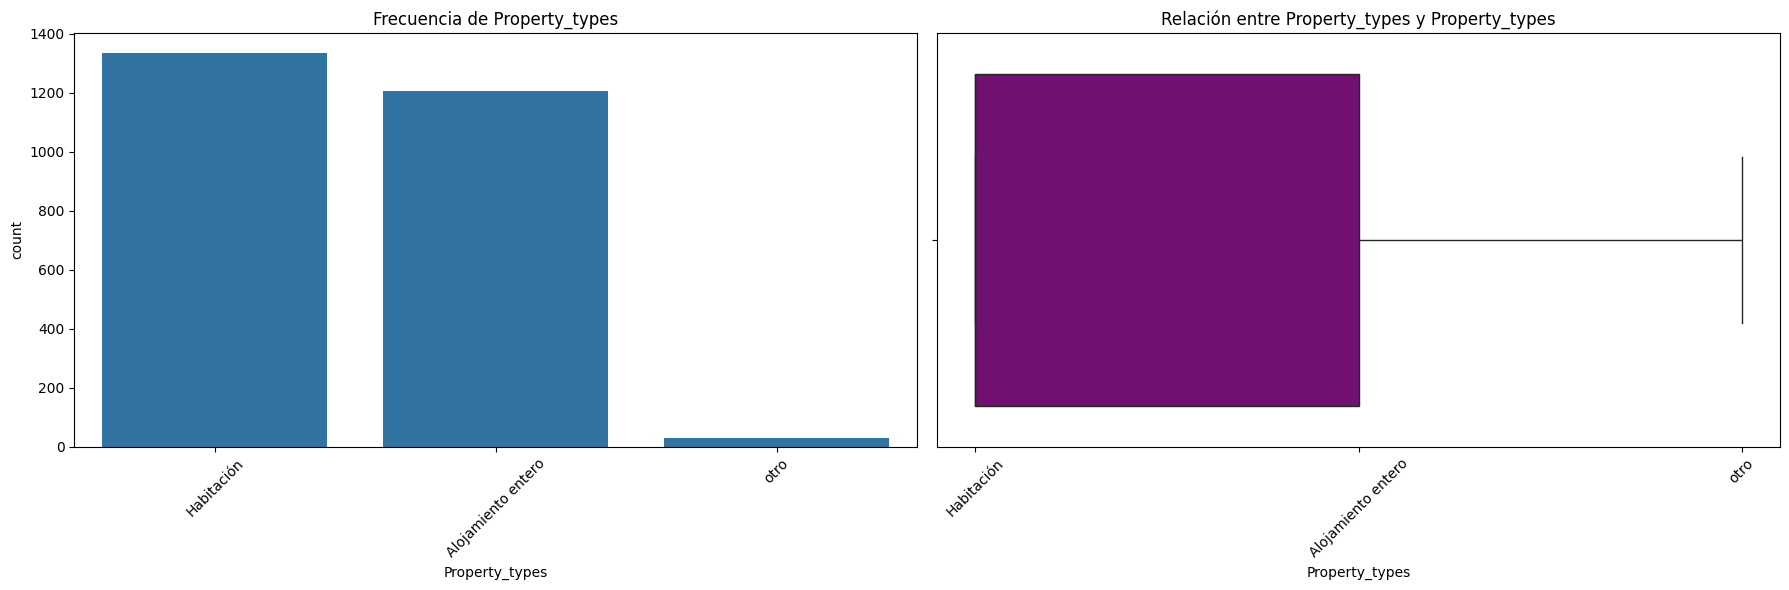

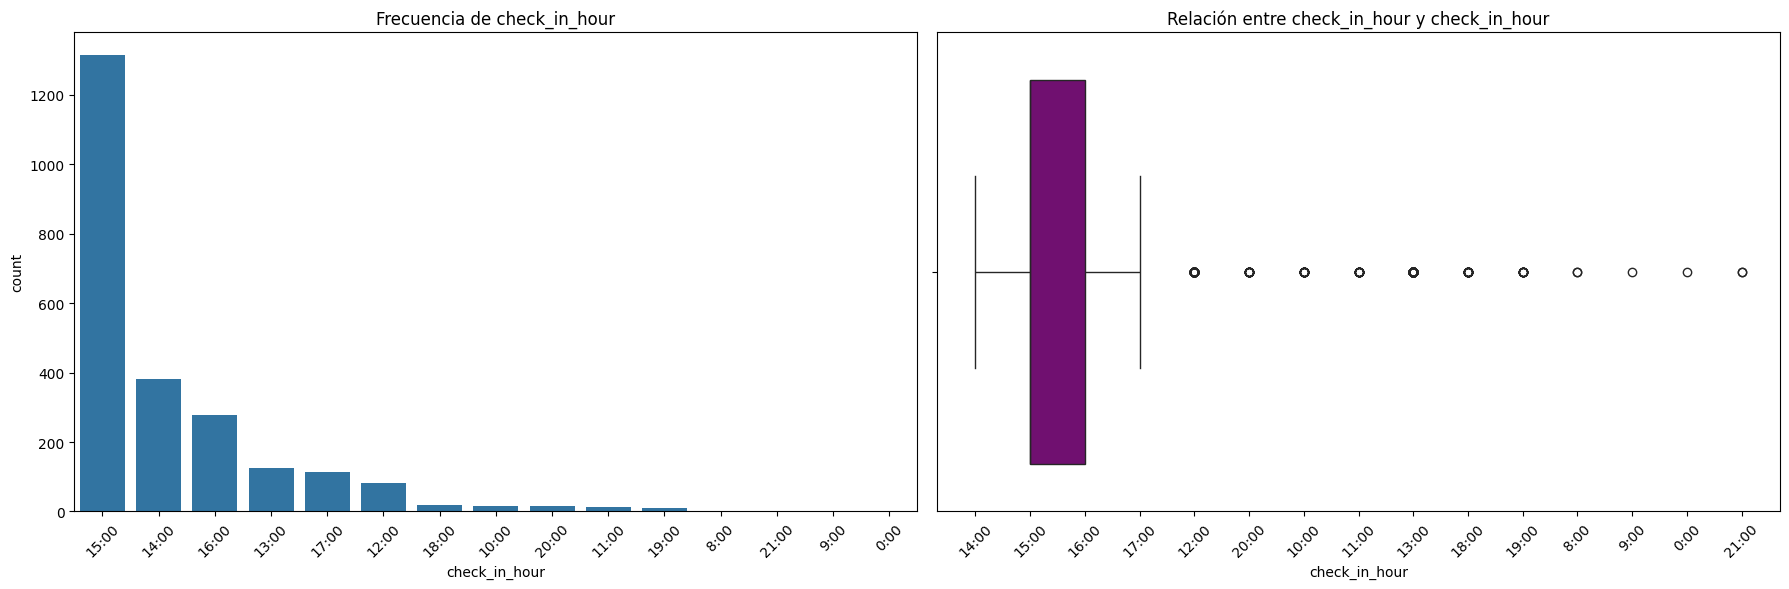

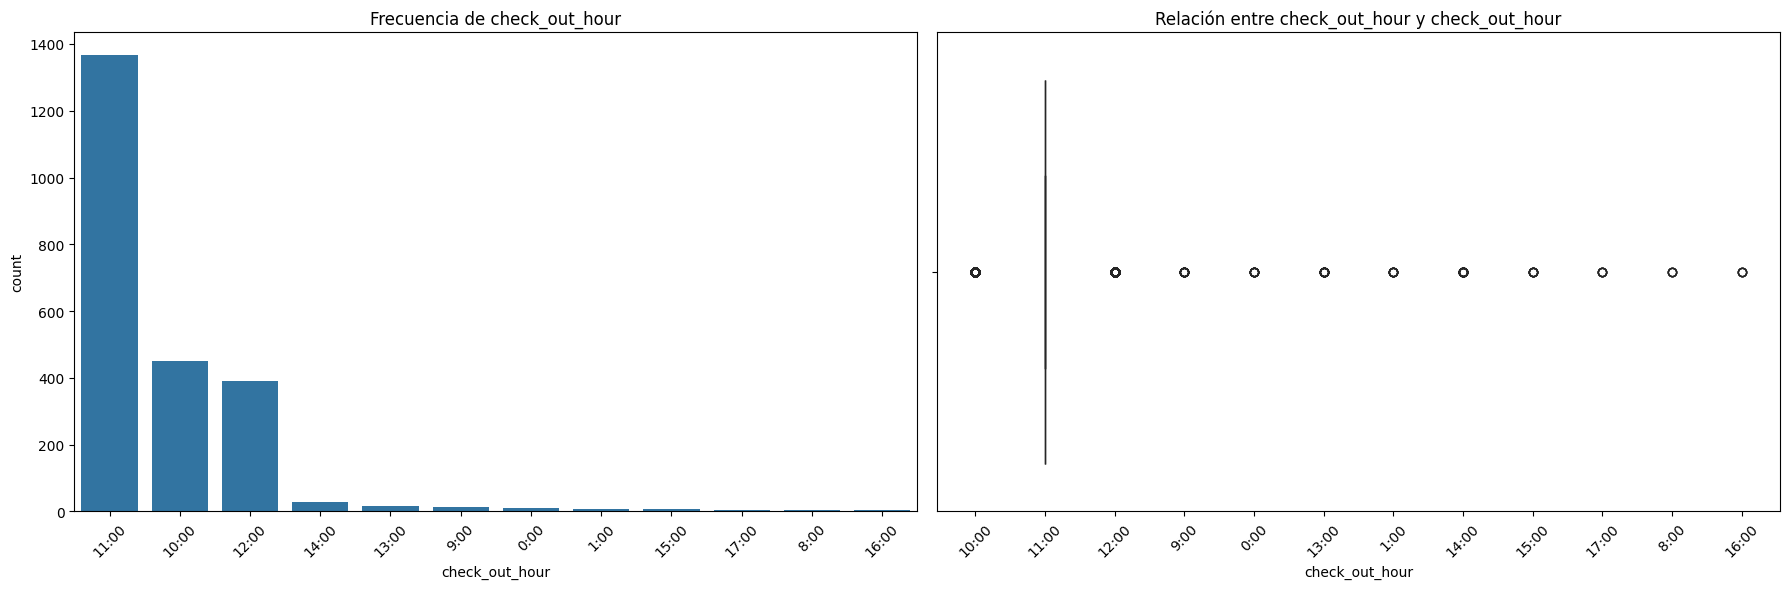

In [6]:
eda_visualization(df)

#### **Análisis de la Relación con el Precio por Noche**
- En esta sección, exploramos cómo las diferentes variables del conjunto de datos se relacionan con el precio por noche. Para las variables numéricas, analizamos su distribución y cómo se correlacionan con el precio, mientras que para las variables categóricas, exploramos su impacto sobre el precio mediante gráficos como boxplots y countplots.

#### *Este análisis nos ayudará a entender mejor cómo las características de los alojamientos afectan los precios y a identificar posibles patrones o outliers*.


In [7]:
def eda_visualization_with_price(df):

    # Análisis de las columnas numéricas en relación al precio
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # No realizar nada si la columna está en excluded_columns
        if column in excluded_columns or column == 'Prices_per_night':
            continue
        
        # Subplot 1: Histograma para ver la distribución del precio y la variable
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=df[column], y=df['Prices_per_night'], color='blue')
        plt.title(f'Relación entre {column} y el precio por noche')
        
        # Subplot 2: Boxplot para ver cómo las columnas afectan al precio
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], y=df['Prices_per_night'], color='red')
        plt.title(f'{column} en relación con el precio por noche')
        
        # Subplot 3: Histograma para la distribución del precio
        plt.subplot(1, 3, 3)
        sns.histplot(df['Prices_per_night'], kde=True, color='green')
        plt.title('Distribución del precio por noche')
        
        # Ajuste para que los subplots no se sobrepongan
        plt.tight_layout()
        plt.show()

    # Análisis de las columnas categóricas en relación al precio
    for column in df.select_dtypes(include=['object']).columns:
        # Si la columna está en excluded_columns, no realizar la visualización
        if column in excluded_columns:
            continue
        
        # Subplot 1: Countplot para ver la distribución de las categorías y el precio
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[column], y=df['Prices_per_night'], color='purple')
        plt.title(f'Relación entre {column} y el precio por noche')
        plt.xticks(rotation=45)
        
        # Subplot 2: Countplot para la frecuencia de las categorías
        plt.subplot(1, 2, 2)
        sns.countplot(x=df[column], order=df[column].value_counts().index, color='orange')
        plt.title(f'Frecuencia de {column}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

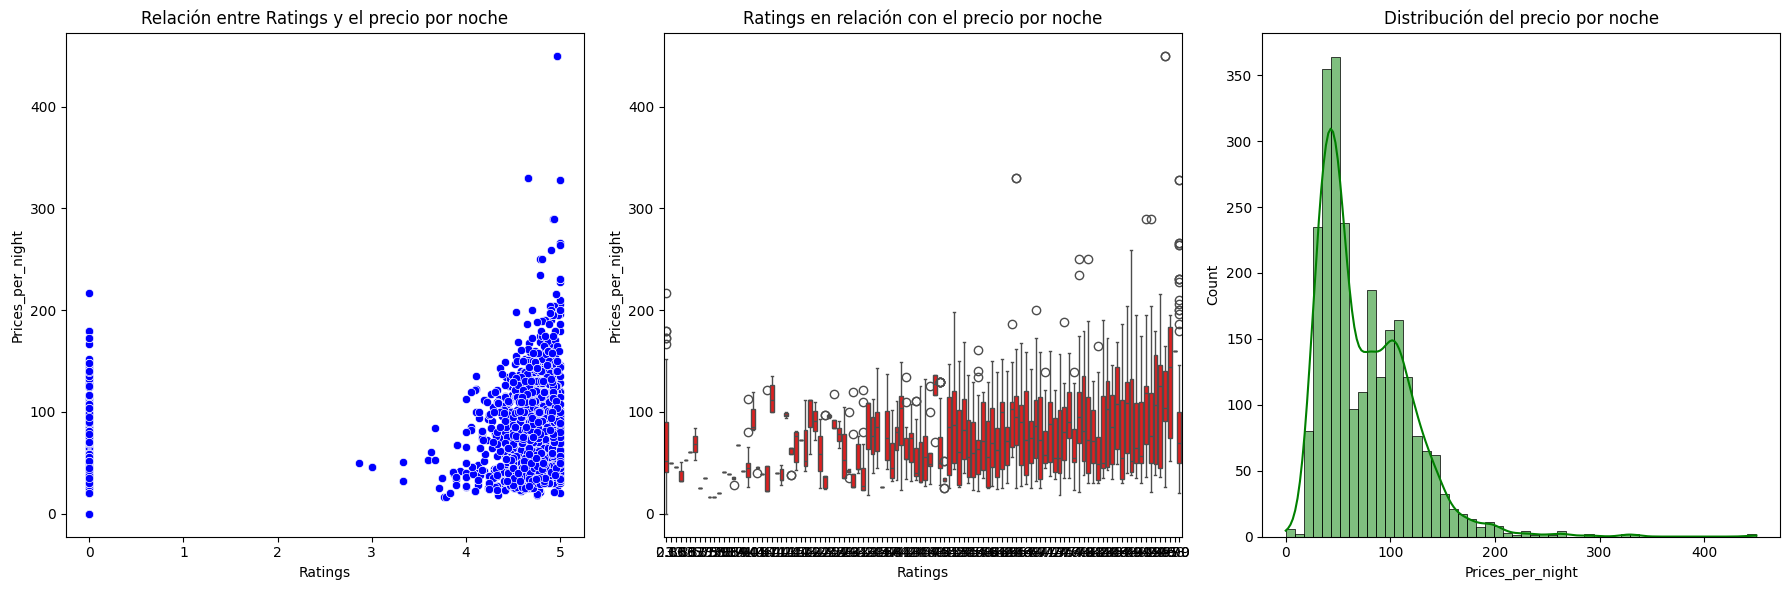

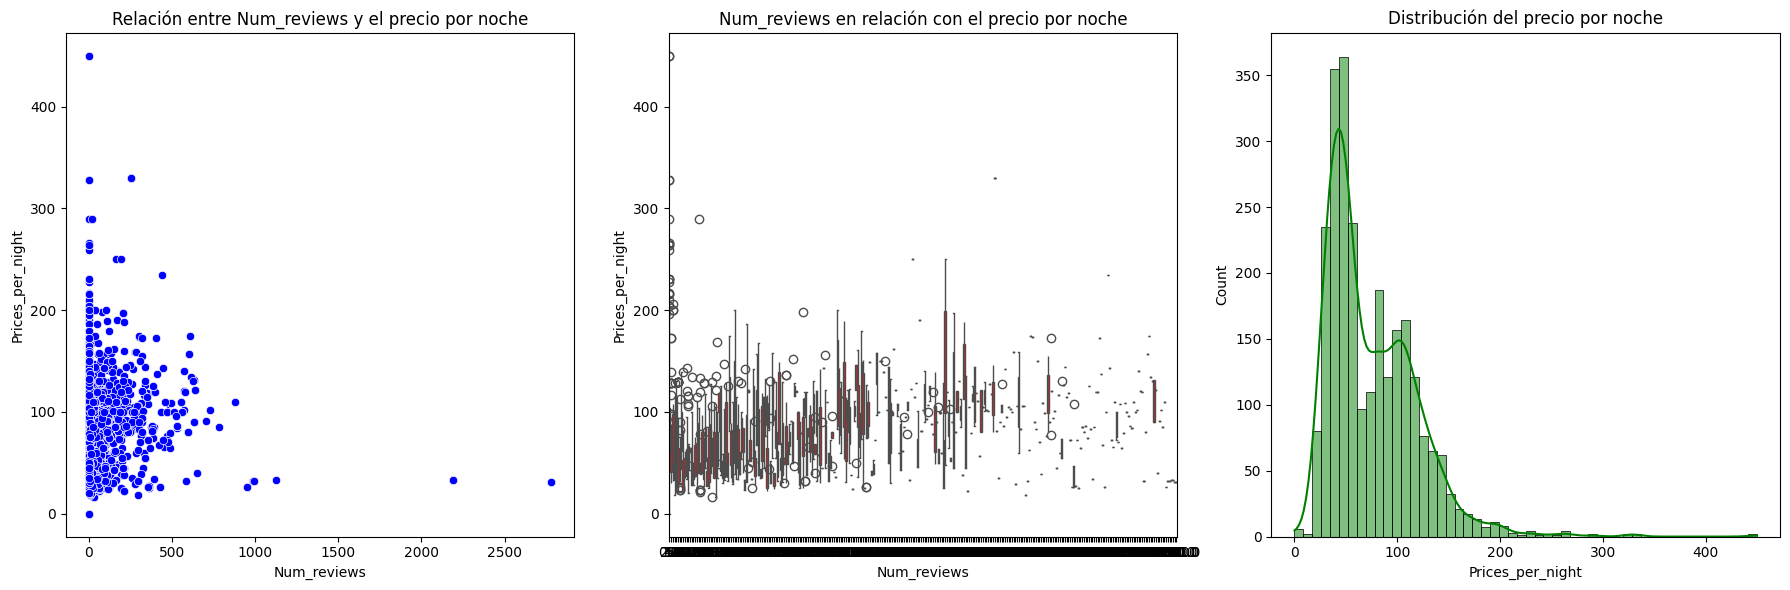

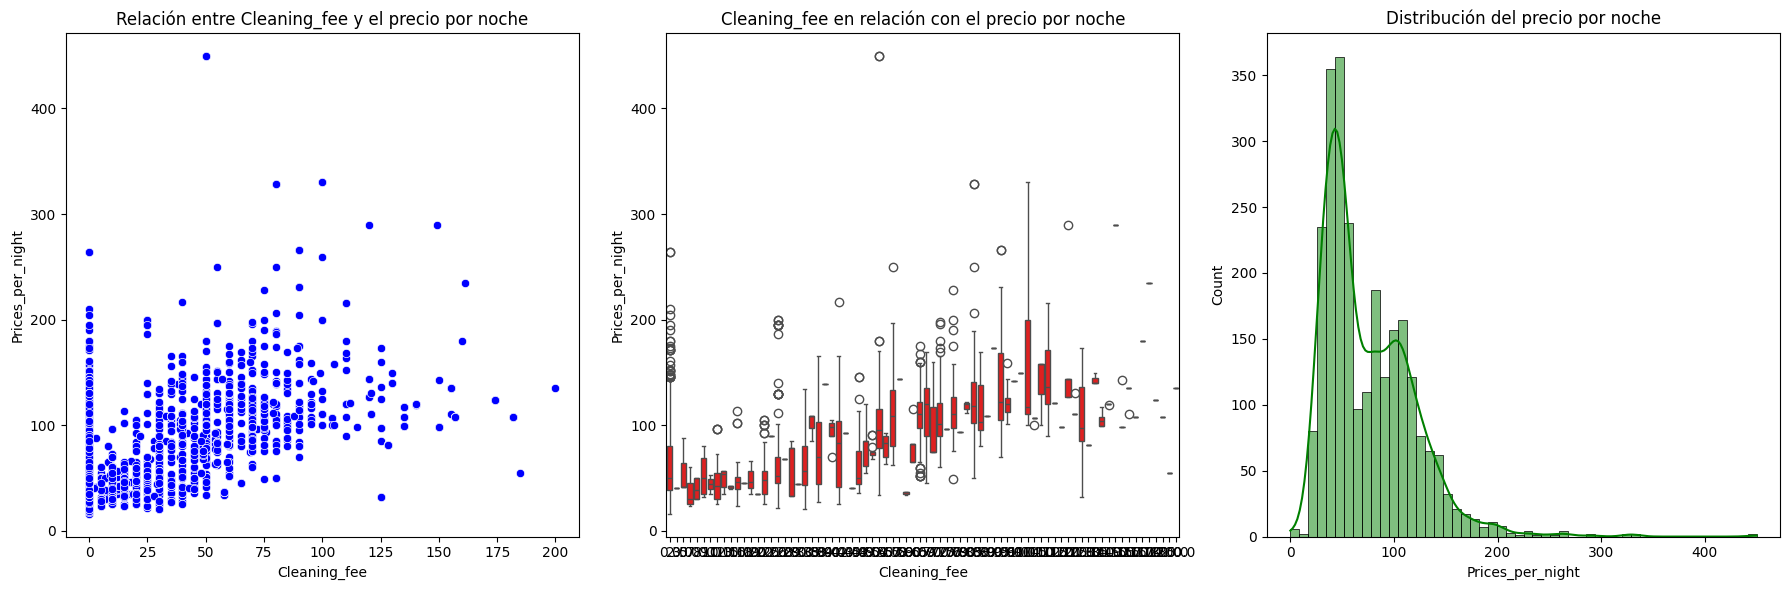

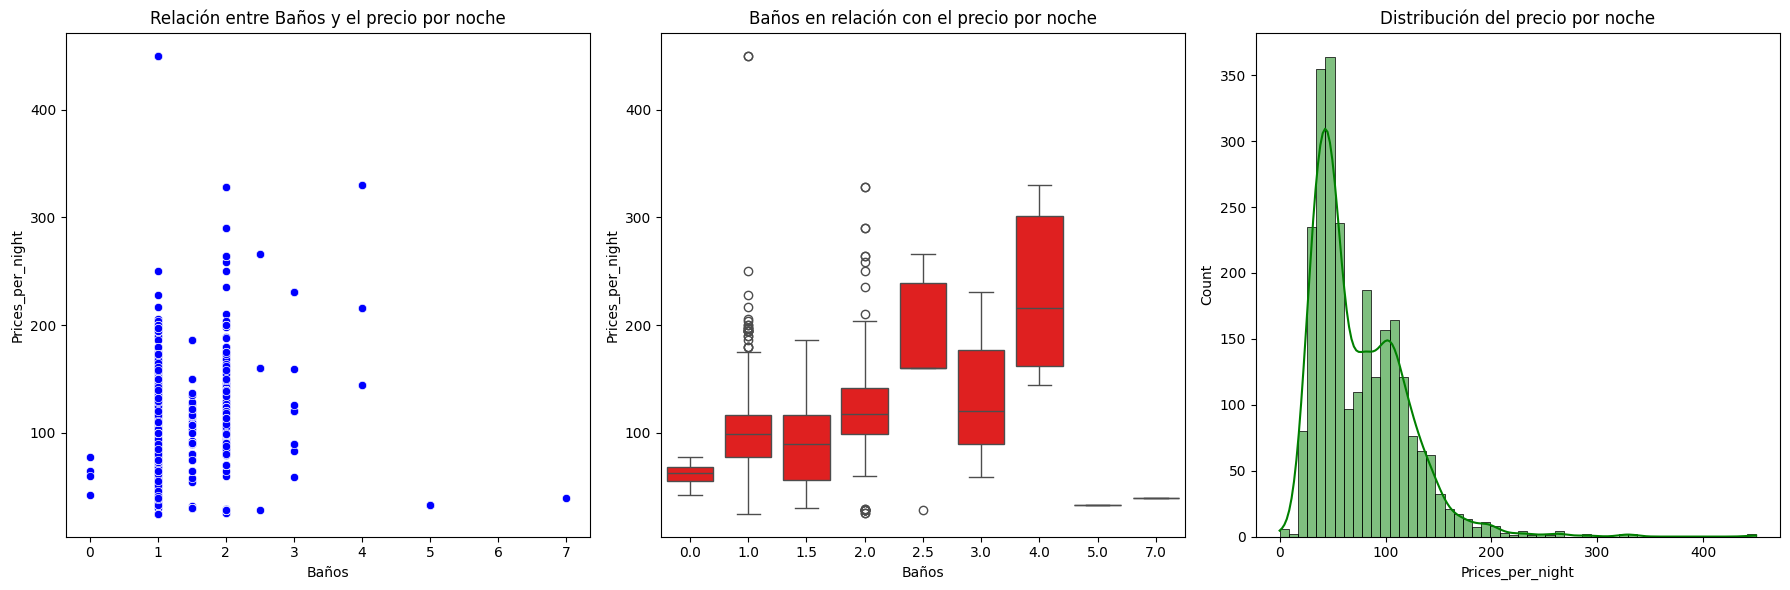

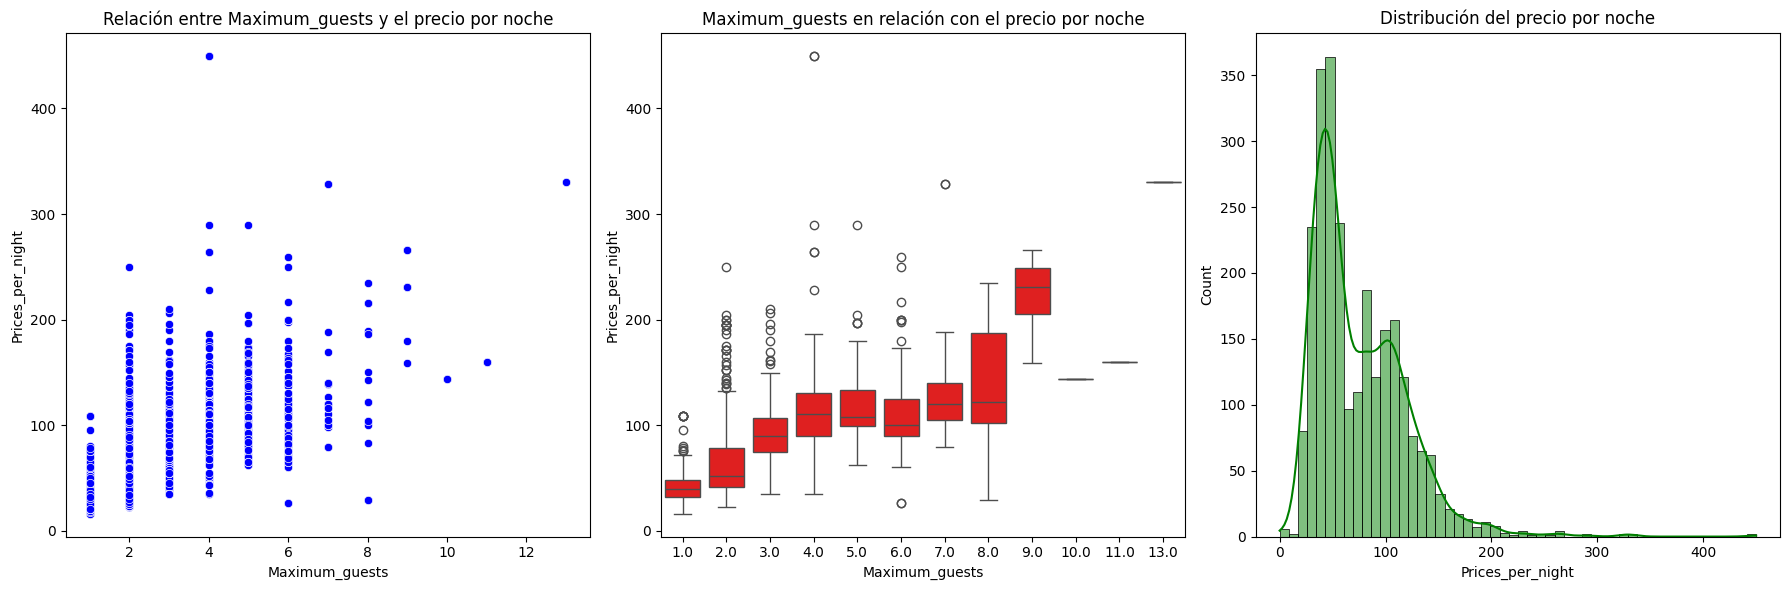

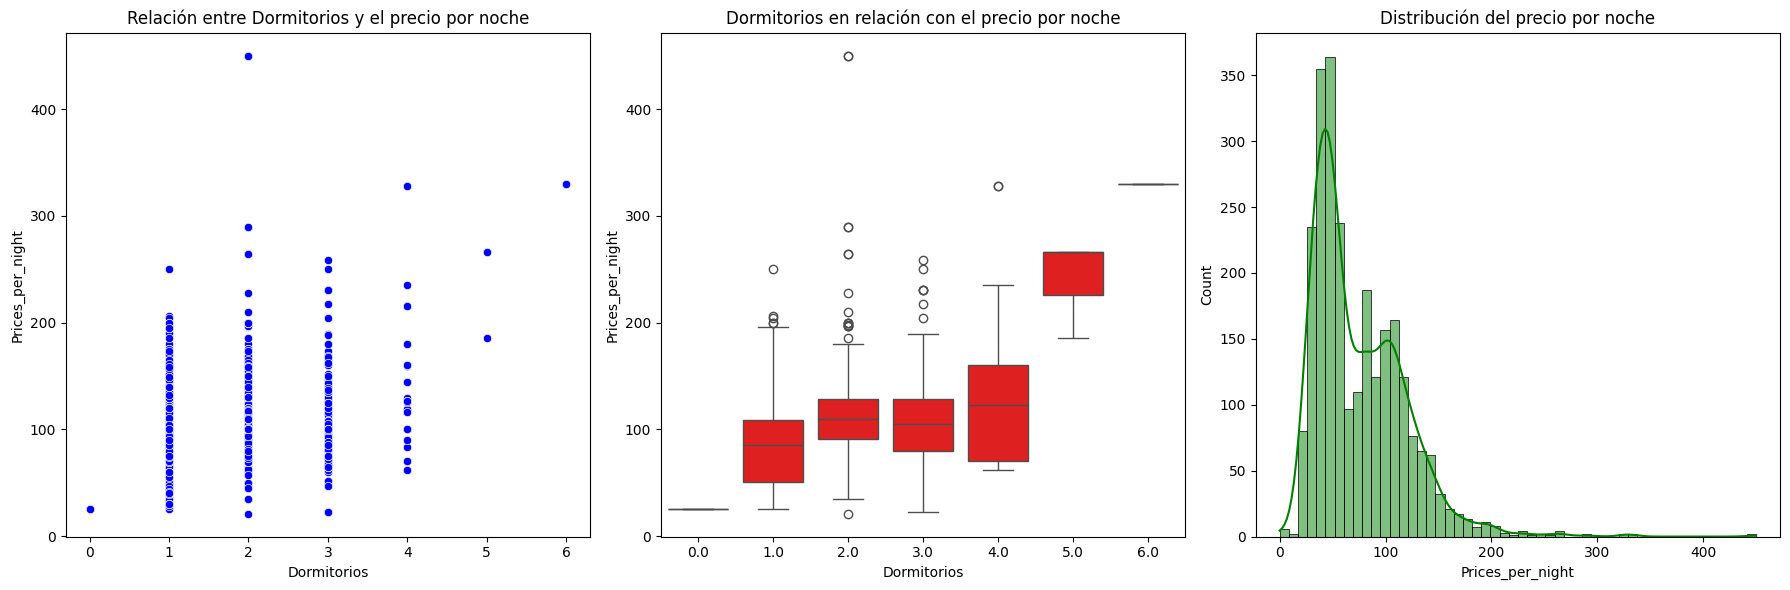

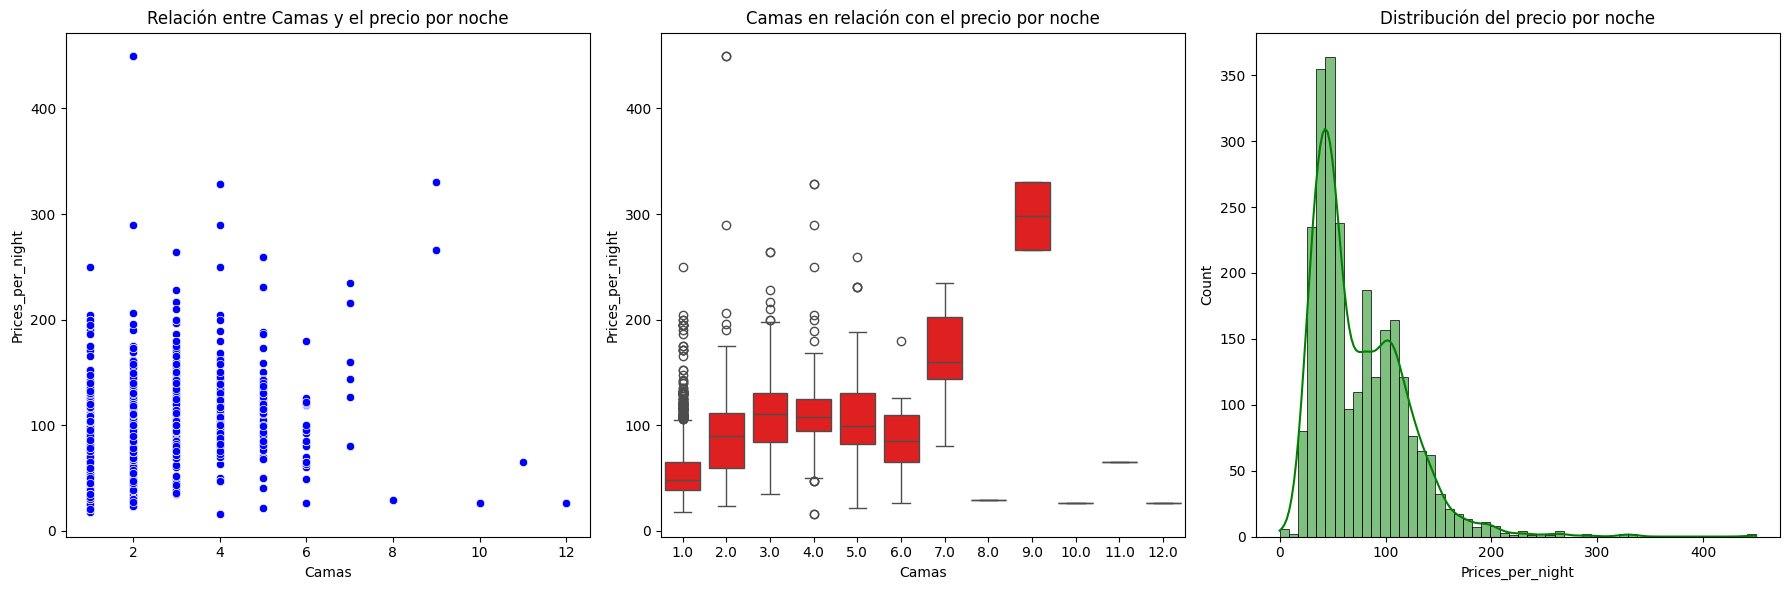

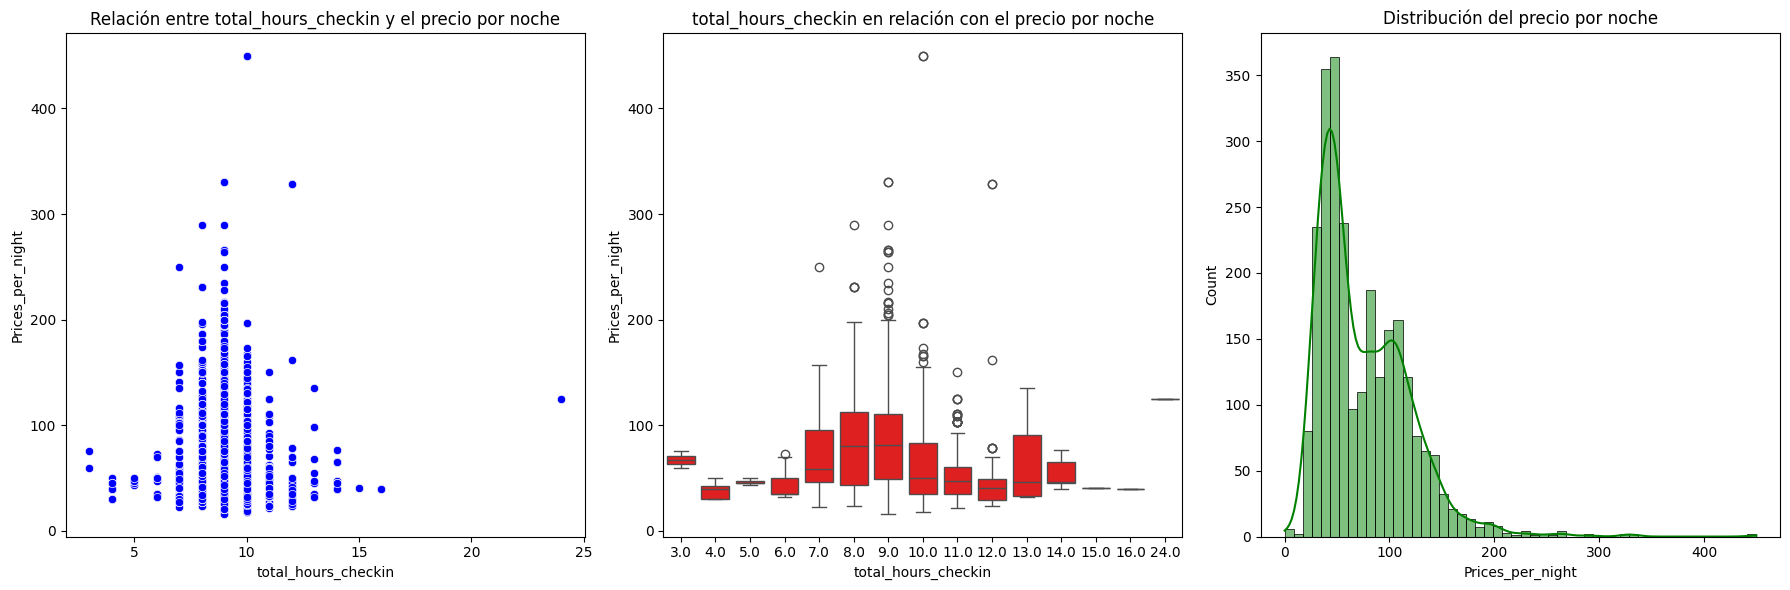

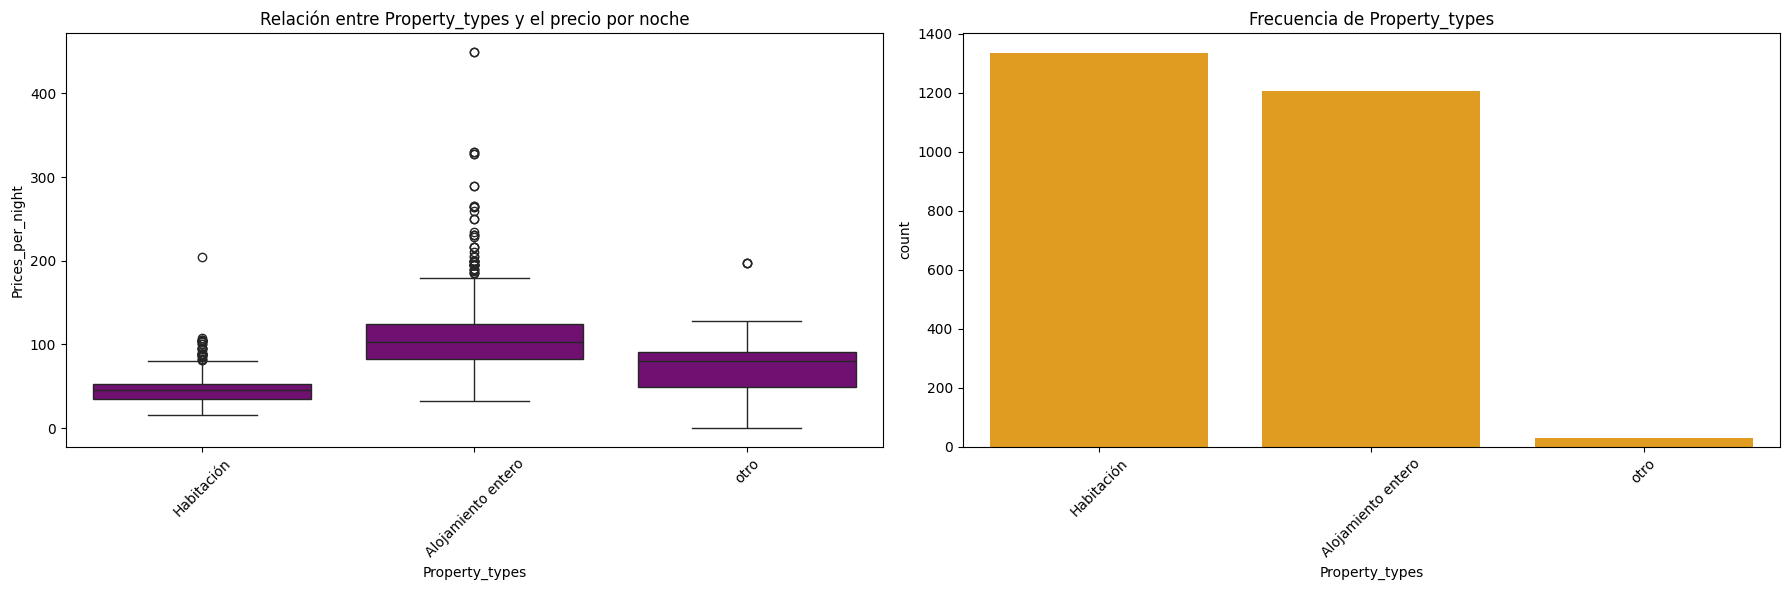

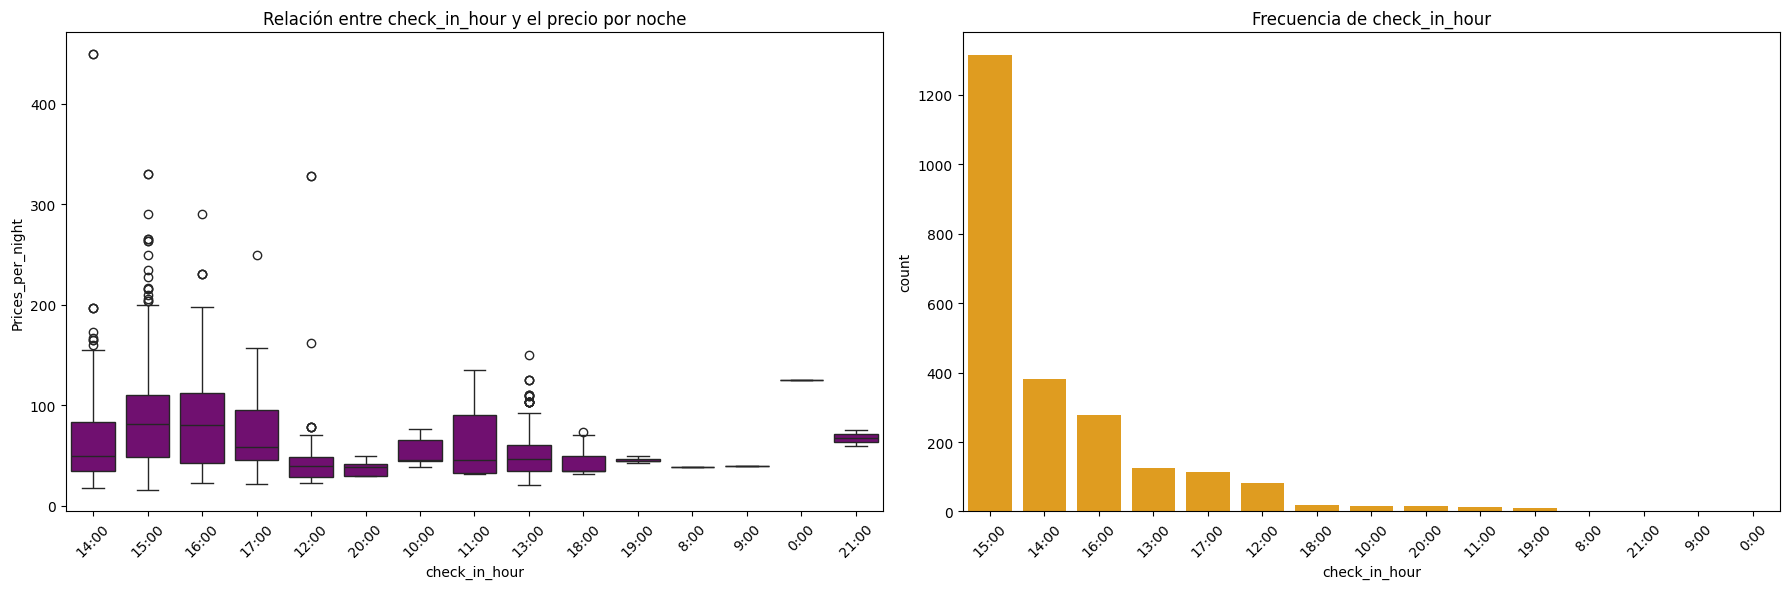

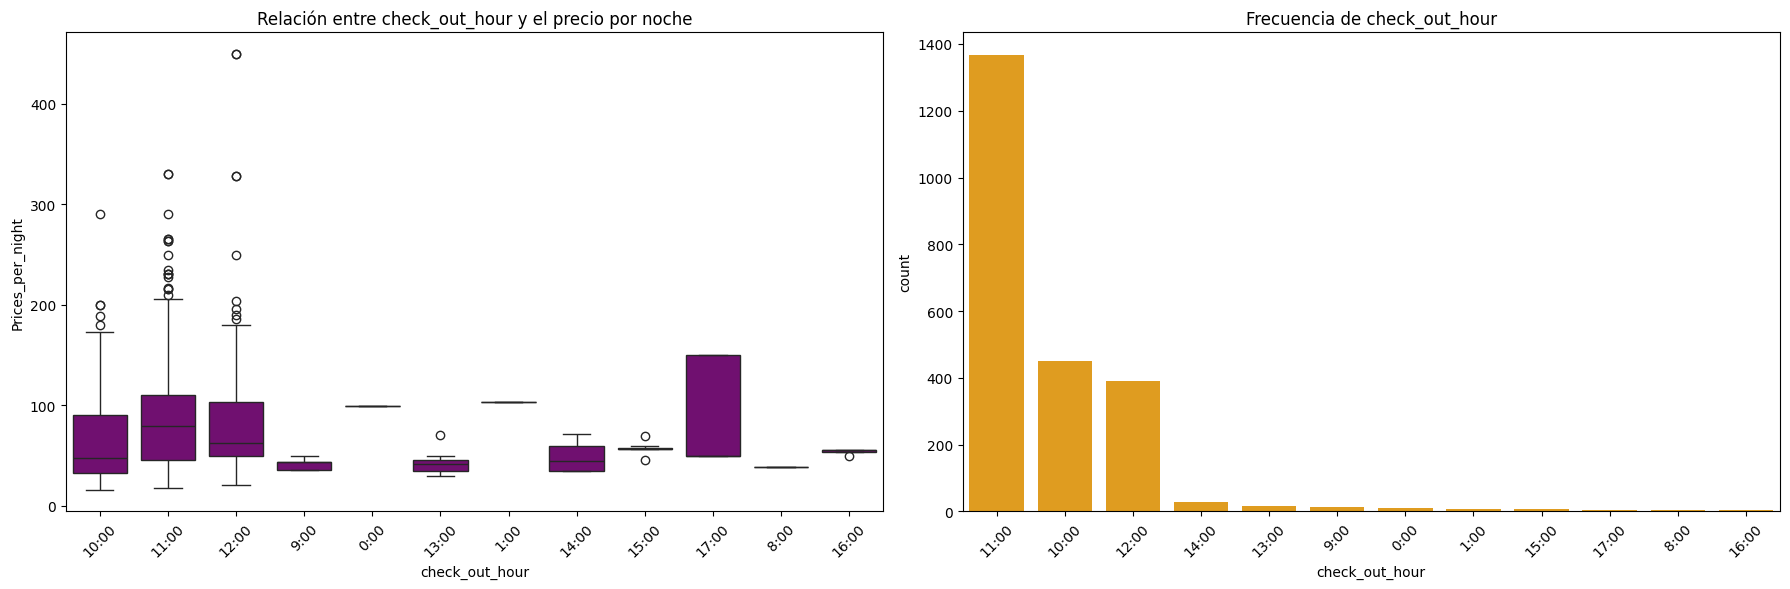

In [8]:
eda_visualization_with_price(df)

#### **Análisis de outliers en relación con el Precio por noche**
- El **boxplot** muestra la distribución de los precios por noche, destacando los valores atípicos (outliers) que se encuentran fuera de los límites superiores e inferiores del IQR.Estos outliers representan precios inusualmente altos o bajos en comparación con la mayoría de los alojamientos.

- El **countplot** visualiza la frecuencia de los precios, donde podemos observar la cantidad de alojamientos en diferentes rangos de precios. Esto nos ayuda a identificar en qué rangos se concentran la mayoría de los alojamientos y cómo se distribuyen los precios en general.

In [9]:
df_no_zero_prices = df[df['Prices_per_night'] != 0]

hist_fig = px.histogram(df_no_zero_prices, x='Prices_per_night', nbins=80, title="Distribución de los Precios por Noche")
hist_fig.update_layout(xaxis_title="Precio (€)", yaxis_title="Conteo", bargap=0.2)

box_fig = px.box(df_no_zero_prices, y='Prices_per_night', points='all', title="Boxplot de los Precios por Noche")
box_fig.update_layout(yaxis_title="Precio (€)")

# Mostrar gráficos
hist_fig.show()
box_fig.show()

#### **Análisis con Z-score**

In [10]:
# Calcular el Z-score para 'Prices_per_night'
z_score = stats.zscore(df['Prices_per_night'])

mean = df['Prices_per_night'].mean()
std = df['Prices_per_night'].std()

# Calcular los límites izquierdo y derecho
lim_l = mean - 3 * std  # Límite inferior
lim_r = mean + 3 * std  # Límite superior


hist_fig = px.histogram(df, x='Prices_per_night', nbins=30, opacity=0.6, 
                        title="Distribución de Prices_per_night con límites Z-score",
                        marginal="violin", histnorm="density")
hist_fig.update_traces(marker=dict(color="lightblue"))
hist_fig.update_layout(bargap=0.05)

# Añadir líneas verticales para los límites izquierdo y derecho
hist_fig.add_vline(x=lim_l, line_width=2, line_dash="dash", line_color="orange", 
                annotation_text="Límite Izquierdo")
hist_fig.add_vline(x=lim_r, line_width=2, line_dash="dash", line_color="orange", 
                annotation_text="Límite Derecho")

hist_fig.show()

- El análisis de precios muestra donde la mayoría de los precios se concentran. Sin embargo, existen algunos precios más altos, entre 200 y 239, que superan el límite Z-score. Aunque estos valores son técnicamente outliers, no necesariamente indican datos erróneos, sino precios más altos que podrían corresponder a alojamientos de lujo o con características especiales.